In [1]:
from tensorflow.keras.datasets import imdb

(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=500)  # 단어 종류를 500(빈도기준)개

17473536/17464789 [==============================] - 0s 0us/step


In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [17]:
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, Activation, Embedding, SimpleRNN, LSTM
from tensorflow.keras.models import Sequential, load_model, Model
from tensorflow.keras.utils import to_categorical
from tensorflow import keras

In [3]:
x_train.shape, x_test.shape

((25000,), (25000,))

In [24]:
x_train = x_train[:2500]
x_test = x_test[:2500]
y_train = y_train[:2500]
y_test = y_test[:2500]

In [25]:
x_train[:4]       # 단어당 번호, talk rising?

array([list([1, 14, 22, 16, 43, 2, 2, 2, 2, 65, 458, 2, 66, 2, 4, 173, 36, 256, 5, 25, 100, 43, 2, 112, 50, 2, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 2, 2, 17, 2, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2, 19, 14, 22, 4, 2, 2, 469, 4, 22, 71, 87, 12, 16, 43, 2, 38, 76, 15, 13, 2, 4, 22, 17, 2, 17, 12, 16, 2, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2, 2, 16, 480, 66, 2, 33, 4, 130, 12, 16, 38, 2, 5, 25, 124, 51, 36, 135, 48, 25, 2, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 2, 15, 256, 4, 2, 7, 2, 5, 2, 36, 71, 43, 2, 476, 26, 400, 317, 46, 7, 4, 2, 2, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2, 56, 26, 141, 6, 194, 2, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 2, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 2, 88, 12, 16, 283, 5, 16, 2, 113, 103, 32, 15, 16, 2, 19, 178, 32]),
       list([1, 194, 2, 194, 2, 78, 228, 5, 6, 2, 2, 2, 134, 26, 4, 2, 8, 118, 2, 14, 394, 20, 13, 119, 2, 189, 102, 5, 207, 110, 2, 21, 

In [26]:
y_train[:4]      # 긍정과 부정의 binary classification

array([1, 0, 0, 1], dtype=int64)

In [27]:
lengths = [len(line) for line in x_train]

(array([  8.,  34.,  79.,  67.,  75., 103., 242., 262., 212., 158., 144.,
        117.,  94.,  94.,  70.,  71.,  41.,  49.,  50.,  47.,  37.,  35.,
         24.,  21.,  29.,  21.,  28.,  18.,  22.,  16.,  13.,  16.,  20.,
         11.,  10.,  10.,   9.,  11.,  18.,  11.,   3.,   7.,   8.,   7.,
          6.,   5.,   4.,   8.,   3.,   4.,   5.,   3.,   3.,   2.,   2.,
          3.,   5.,   3.,   2.,   2.,   5.,   9.,   1.,   2.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          1.]),
 array([  16.  ,   32.13,   48.26,   64.39,   80.52,   96.65,  112.78,
         128.91,  145.04,  161.17,  177.3 ,  193.43,  209.56,  225.69,
         241.82,  257.95,  274.08,  290.21,  306.34,  322.47,  338.6 ,
         354.73,  370.86,  386.99,  403.12,  419.25,  435.38,  451.51,
         467.64,  483.77,  499.9 ,

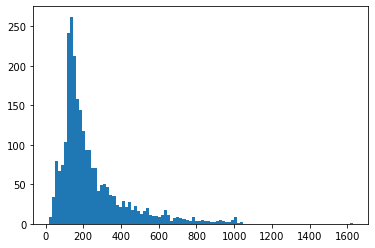

In [28]:
plt.hist(lengths, bins=100)

In [29]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [30]:
x_train_seq = pad_sequences(x_train, maxlen=200)   # 길이를 200으로 맞춰줌 default는 앞에서 짜르고 뒤에를 200으로

In [31]:
x_test_seq = pad_sequences(x_test, maxlen=200)    # 길이가 200보다 작으면 앞부분을 0으로 채움

In [16]:
print(x_train_seq.shape, x_test_seq.shape)

(25000, 200) (25000, 200)


In [19]:
model = Sequential()
model.add(SimpleRNN(8, input_shape=(200,1)))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_1 (SimpleRNN)    (None, 8)                 80        
                                                                 
 dense (Dense)               (None, 1)                 9         
                                                                 
Total params: 89
Trainable params: 89
Non-trainable params: 0
_________________________________________________________________


In [20]:
model.compile(loss='binary_crossentropy', metrics=['accuracy'], optimizer='adam')

In [23]:
model.fit(x_train_seq, y_train, epochs=10, batch_size=64, validation_data=(x_test_seq, y_test))

Epoch 1/10
391/391 [==============================] - 82s 209ms/step - loss: 0.6927 - accuracy: 0.5147 - val_loss: 0.6933 - val_accuracy: 0.5078
Epoch 2/10
391/391 [==============================] - 80s 206ms/step - loss: 0.6924 - accuracy: 0.5153 - val_loss: 0.6929 - val_accuracy: 0.5061
Epoch 3/10
391/391 [==============================] - 81s 208ms/step - loss: 0.6923 - accuracy: 0.5182 - val_loss: 0.6933 - val_accuracy: 0.5148
Epoch 4/10
391/391 [==============================] - 81s 206ms/step - loss: 0.6922 - accuracy: 0.5169 - val_loss: 0.6934 - val_accuracy: 0.5134
Epoch 5/10
391/391 [==============================] - 81s 206ms/step - loss: 0.6921 - accuracy: 0.5182 - val_loss: 0.6933 - val_accuracy: 0.5087
Epoch 6/10
391/391 [==============================] - 80s 205ms/step - loss: 0.6923 - accuracy: 0.5165 - val_loss: 0.6930 - val_accuracy: 0.5067
Epoch 7/10
391/391 [==============================] - 79s 202ms/step - loss: 0.6922 - accuracy: 0.5182 - val_loss: 0.6930 - val_ac

KeyboardInterrupt: 

In [ ]:
# one-hot

In [32]:
from tensorflow.keras.utils import to_categorical
x_train_oh = to_categorical(x_train_seq)
x_test_oh = to_categorical(x_test_seq)

In [33]:
x_train_oh.shape

(2500, 200, 500)

In [34]:
model = Sequential()
model.add(SimpleRNN(8, input_shape=(200,500)))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_2 (SimpleRNN)    (None, 8)                 4072      
                                                                 
 dense_1 (Dense)             (None, 1)                 9         
                                                                 
Total params: 4,081
Trainable params: 4,081
Non-trainable params: 0
_________________________________________________________________


In [35]:
model.compile(loss='binary_crossentropy', metrics=['accuracy'], optimizer='adam')

In [37]:
model.fit(x_train_oh, y_train, epochs=10, batch_size=64, validation_data=(x_test_oh, y_test))

Epoch 1/10
40/40 [==============================] - 9s 235ms/step - loss: 0.6337 - accuracy: 0.6612 - val_loss: 0.6532 - val_accuracy: 0.6232
Epoch 2/10
40/40 [==============================] - 9s 225ms/step - loss: 0.6441 - accuracy: 0.6160 - val_loss: 0.6572 - val_accuracy: 0.6108
Epoch 3/10
40/40 [==============================] - 9s 226ms/step - loss: 0.5858 - accuracy: 0.7372 - val_loss: 0.6156 - val_accuracy: 0.6904
Epoch 4/10
40/40 [==============================] - 9s 229ms/step - loss: 0.5475 - accuracy: 0.7632 - val_loss: 0.6139 - val_accuracy: 0.6732
Epoch 5/10
40/40 [==============================] - 9s 226ms/step - loss: 0.5128 - accuracy: 0.7948 - val_loss: 0.5912 - val_accuracy: 0.6992
Epoch 6/10
40/40 [==============================] - 9s 226ms/step - loss: 0.4715 - accuracy: 0.8192 - val_loss: 0.5588 - val_accuracy: 0.7368
Epoch 7/10
40/40 [==============================] - 9s 232ms/step - loss: 0.4415 - accuracy: 0.8352 - val_loss: 0.5505 - val_accuracy: 0.7344
Epoch 

In [ ]:
# lstm

In [38]:
model = Sequential()
model.add(LSTM(8, input_shape=(200,500)))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 8)                 16288     
                                                                 
 dense_2 (Dense)             (None, 1)                 9         
                                                                 
Total params: 16,297
Trainable params: 16,297
Non-trainable params: 0
_________________________________________________________________


In [39]:
model.compile(loss='binary_crossentropy', metrics=['accuracy'], optimizer='adam')

In [40]:
model.fit(x_train_oh, y_train, epochs=10, batch_size=64, validation_data=(x_test_oh, y_test))

Epoch 1/10
40/40 [==============================] - 14s 52ms/step - loss: 0.6919 - accuracy: 0.5284 - val_loss: 0.6918 - val_accuracy: 0.5112
Epoch 2/10
40/40 [==============================] - 1s 24ms/step - loss: 0.6881 - accuracy: 0.5720 - val_loss: 0.6885 - val_accuracy: 0.5240
Epoch 3/10
40/40 [==============================] - 1s 25ms/step - loss: 0.6600 - accuracy: 0.6068 - val_loss: 0.7183 - val_accuracy: 0.6108
Epoch 4/10
40/40 [==============================] - 1s 25ms/step - loss: 0.6229 - accuracy: 0.6884 - val_loss: 0.5893 - val_accuracy: 0.7400
Epoch 5/10
40/40 [==============================] - 1s 25ms/step - loss: 0.5675 - accuracy: 0.7408 - val_loss: 0.5567 - val_accuracy: 0.7568
Epoch 6/10
40/40 [==============================] - 1s 25ms/step - loss: 0.5302 - accuracy: 0.7708 - val_loss: 0.5367 - val_accuracy: 0.7620
Epoch 7/10
40/40 [==============================] - 1s 25ms/step - loss: 0.5024 - accuracy: 0.7800 - val_loss: 0.5424 - val_accuracy: 0.7560
Epoch 8/10
4

In [ ]:
# one-hot으로 하지 않고 embedding으로 함

In [42]:
model = Sequential()
model.add(Embedding(500, 16, input_length=200))       # 500을 16차원으로 바꿔줌
model.add(LSTM(8))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 200, 16)           8000      
                                                                 
 lstm_1 (LSTM)               (None, 8)                 800       
                                                                 
 dense_3 (Dense)             (None, 1)                 9         
                                                                 
Total params: 8,809
Trainable params: 8,809
Non-trainable params: 0
_________________________________________________________________


In [43]:
model.compile(loss='binary_crossentropy', metrics=['accuracy'], optimizer='adam')

In [49]:
hist = model.fit(x_train_seq, y_train, epochs=50, batch_size=64, validation_data=(x_test_seq, y_test))

Epoch 1/50
40/40 [==============================] - 1s 25ms/step - loss: 0.0701 - accuracy: 0.9824 - val_loss: 0.9756 - val_accuracy: 0.7436
Epoch 2/50
40/40 [==============================] - 1s 14ms/step - loss: 0.0684 - accuracy: 0.9840 - val_loss: 0.9740 - val_accuracy: 0.7440
Epoch 3/50
40/40 [==============================] - 1s 13ms/step - loss: 0.0839 - accuracy: 0.9808 - val_loss: 0.9976 - val_accuracy: 0.7420
Epoch 4/50
40/40 [==============================] - 1s 13ms/step - loss: 0.1102 - accuracy: 0.9708 - val_loss: 0.9478 - val_accuracy: 0.7496
Epoch 5/50
40/40 [==============================] - 1s 13ms/step - loss: 0.0815 - accuracy: 0.9812 - val_loss: 0.9615 - val_accuracy: 0.7476
Epoch 6/50
40/40 [==============================] - 1s 13ms/step - loss: 0.0702 - accuracy: 0.9828 - val_loss: 1.0001 - val_accuracy: 0.7472
Epoch 7/50
40/40 [==============================] - 1s 13ms/step - loss: 0.0848 - accuracy: 0.9776 - val_loss: 0.9591 - val_accuracy: 0.7480
Epoch 8/50
40

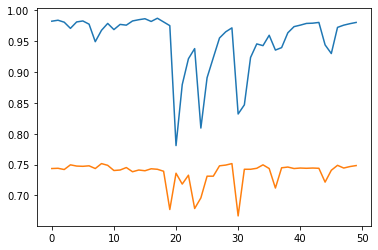

In [55]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])


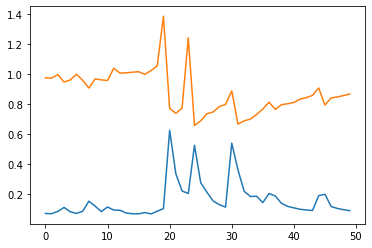

In [51]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])

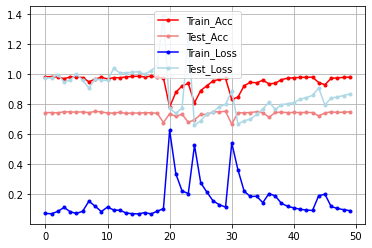

In [54]:
acc = hist.history['accuracy']
val_acc = hist.history['val_accuracy']
loss = hist.history['loss']
val_loss = hist.history['val_loss']

x_len = np.arange(len(loss))
plt.plot(x_len, acc, marker = '.', c='red', label='Train_Acc')
plt.plot(x_len, val_acc, marker = '.', c='lightcoral', label='Test_Acc')
plt.plot(x_len, loss, marker = '.', c='blue', label='Train_Loss')
plt.plot(x_len, val_loss, marker = '.', c='lightblue', label='Test_Loss')

plt.legend()
plt.grid()
plt.show()